# EOFs feedbacks analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and carry out an EOF analysis in oder to identify the leading patterns of feedback response. The input of this EOF analysis consists of the feedbacks anomaly matrix (N members x lat/lon position). 

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# Read files : radiative budget, tas

In [3]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
filename='*_amip_*.nc'
variables = ['rlut', 'rsut','rsdt','tas']

# The amip experiment : 

#path=path_official
#official_amip = get_3D_xarr(path, filename, variables)
#official_amip_SW = get_3D_SW_xarr(path, filename, variables)
#official_amip_LW = get_3D_LW_xarr(path, filename, variables)
#official_amip_N = get_3D_budget_xarr(path, filename, variables)

#path=path_PPE+'CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p1f2/'
#p1_amip = get_3D_xarr(path, filename, variables)
#p1_amip_SW = get_3D_SW_xarr(path, filename, variables)
#p1_amip_LW = get_3D_LW_xarr(path, filename, variables)
#p1_amip_N = get_3D_budget_xarr(path, filename, variables)


# List, à changer en fonction de ce que l'on veut regarder :
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412']

# List sans les outliers
#nb_p_list = ['p105',  'p30',  'p65', 'p15', 'p109',  'p160',  'p34', 'p111', \
#            'p36', 'p122',  'p39',  'p83', 'p123', 'p88', 'p184', 'p131',  'p49', \
#            'p133',  'p193', 'p13',  'p195', 'p140', 'p142', 'p58', \
#            'p144', 'p148', 'p14', 'p209', 'p216', 'p218', 'p222', 'p227', 'p244', \
#            'p245', 'p249', 'p254', 'p255', 'p262', 'p269', 'p279', 'p281', 'p294', \
#            'p297', 'p2', 'p4'] # Fin du premier petit ensemble

# List avec les outliers 
#nb_p_list = ['p105','p30','p65','p15','p109','p160','p34','p111', \
#            'p36','p122','p39','p83','p123','p88','p184','p131','p49', \
#            'p133','p193','p13','p195','p93','p140','p57','p142','p58', \
#            'p144','p148','p14','p209','p216','p218','p222','p227','p244', \
#            'p245','p249','p254','p255','p262','p269','p279','p281','p287','p294', \
#            'p297','p2','p4']


N=len(nb_p_list)
amip={}
amip_SW={}
amip_LW={}
amip_N={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip_LHS500_PPE/CNRM-CM6-1_amip_r1i1'+str(nb_p)+'f2/'
    amip[str(nb_p)] = get_3D_xarr(path, filename, variables)
    amip_SW[str(nb_p)] = get_3D_SW_xarr(path, filename, variables)
    amip_LW[str(nb_p)] = get_3D_LW_xarr(path, filename, variables)
    amip_N[str(nb_p)] = get_3D_budget_xarr(path, filename, variables)
    i=i+1             

p311
p312
p314
p316
p317
p319
p320
p321
p322
p324
p325
p326
p329
p330
p331
p332
p335
p336
p337
p338
p340
p341
p343
p344
p346
p347
p348
p349
p350
p353
p355
p357
p359
p360
p361
p363
p365
p367
p368
p369
p372
p373
p374
p375
p376
p378
p381
p382
p384
p386
p388
p389
p391
p392
p393
p394
p395
p396
p398
p399
p400
p404
p406
p407
p409
p410
p411
p412


# Create EOF input matrix

In [4]:
# We want to compute the Deltas and the feedbacks of each perturbations (amip - amip-future4K)

n=len(nb_p_list)

SW=[0]*(n)
LW=[0]*(n)
N=[0]*(n)

#official_Delta_tas = official_future4K['tas'] - official_amip['tas']
#official_Delta_SW = official_future4K_SW - official_amip_SW
#official_Delta_LW = official_future4K_LW - official_amip_LW
#official_Delta_N = official_future4K_N - official_amip_N
#SW[0] = official_Delta_SW/DeltaT_ensemble_mean
#LW[0] = official_Delta_LW/DeltaT_ensemble_mean
#N[0] = official_Delta_N/DeltaT_ensemble_mean

#p1_Delta_tas = p1_future4K['tas'] - p1_amip['tas']
#p1_Delta_SW = p1_future4K_SW - p1_amip_SW
#p1_Delta_LW = p1_future4K_LW - p1_amip_LW
#SW[1] = p1_Delta_SW/p1_Delta_tas
#LW[1] = p1_Delta_LW/p1_Delta_tas


i = 0
while i<n:
    nb_p = nb_p_list[i]
    #print(nb_p)
    SW_tmp = amip_SW[str(nb_p)] 
    LW_tmp = amip_LW[str(nb_p)] 
    N_tmp = amip_N[str(nb_p)]
    #j=i+1
    SW[i] = SW_tmp
    LW[i] = LW_tmp
    N[i] = N_tmp
    i+=1

In [5]:
SW_matrix = xr.combine_nested(SW, concat_dim=['time'])
SW_matrix

<xarray.DataArray (time: 68, lat: 128, lon: 256)>
dask.array<concatenate, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

In [6]:
LW_matrix = xr.combine_nested(LW, concat_dim=['time'])
LW_matrix

<xarray.DataArray 'rlut' (time: 68, lat: 128, lon: 256)>
dask.array<concatenate, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time
Attributes:
    long_name:           TOA Outgoing Longwave Radiation
    units:               W m-2
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       toa_outgoing_longwave_flux
    description:         at the top of the atmosphere (to be compared with sa...
    positive:            up
    history:             none
    cell_measures:       area: areacella

In [63]:
N_matrix = xr.combine_nested(N, concat_dim=['time'])
N_matrix

<xarray.DataArray (time: 68, lat: 128, lon: 256)>
dask.array<concatenate, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

# EOF analysis (N)

In [8]:
# Pondérer par cosinus de latitude : 
lats = N_matrix['lat'][:]
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts_N = np.sqrt(coslat).drop(labels='height').values
W_N =wgts_N[np.newaxis,:,np.newaxis]
W_N

array([[[0.13679714],
        [0.20723052],
        [0.25940918],
        [0.30271101],
        [0.34048839],
        [0.37438938],
        [0.40536657],
        [0.43402829],
        [0.46079044],
        [0.4859518 ],
        [0.50973526],
        [0.53231206],
        [0.553817  ],
        [0.57435825],
        [0.59402409],
        [0.61288755],
        [0.63100977],
        [0.6484425 ],
        [0.66522991],
        [0.68141001],
        [0.69701574],
        [0.71207583],
        [0.72661548],
        [0.74065688],
        [0.7542197 ],
        [0.76732142],
        [0.77997763],
        [0.79220229],
        [0.80400795],
        [0.81540589],
        [0.82640631],
        [0.83701843],
        [0.84725061],
        [0.85711046],
        [0.86660488],
        [0.87574018],
        [0.8845221 ],
        [0.89295589],
        [0.90104636],
        [0.90879791],
        [0.91621456],
        [0.92329999],
        [0.9300576 ],
        [0.93649048],
        [0.94260146],
        [0

In [9]:
# Compute anomalies by removing the time-mean.
N_mean = N_matrix.mean(axis=0)
N_anom = N_matrix - N_mean
N_mean

<xarray.DataArray (lat: 128, lon: 256)>
dask.array<mean_agg-aggregate, shape=(128, 256), dtype=float32, chunksize=(128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93

In [10]:
N_mean_df = N_mean.to_dataframe(name='N_mean').drop(labels = 'height', axis=1)
N_mean_df


# Save the numpy array in a file  
N_mean_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_N_mean.npy')

In [11]:
# Create an EOF solver to do the EOF analysis. 
solver = Eof(N_anom, weights=W_N)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SW feedbacks at each grid point, and the
# leading PC time series itself.
eof = solver.eofsAsCovariance(neofs=5, pcscaling=1)
pc = solver.pcs(pcscaling=1)

In [12]:
varFrac = solver.varianceFraction(neigs=5)
varFrac

<xarray.DataArray 'variance_fractions' (mode: 5)>
array([0.7114529 , 0.10967637, 0.07389148, 0.02397345, 0.01121336],
      dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2 3 4
Attributes:
    long_name:  variance_fractions

## Plotting

In [13]:
def eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure):
    # Plot the EOF map 

    lat = data['lat'][:]
    lon = data['lon'][:]

    fig = plt.figure(figsize=(10, 10))
    ax=plt.gca()

    eof = eof_nb-1
    data = data[eof]
    ax.set_title(title, fontsize=18, fontweight = 'bold')

    m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
    x, y = m(*np.meshgrid(lon,lat))


    cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

    m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
    cbar.set_label(' ', size = 16, style = 'italic')

    m.drawcoastlines()
    m.drawmapboundary()
    plt.clim(label_min, label_max)

    # Enregistrer la figure .....................

    plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

    # Show la figure .................
    plt.show()

In [14]:
def pc_plot(data, pc_nb, ymin, ymax, title, name_figure):
    #pc = solver.pcs(pcscaling=1)
    #pc = pc*-1

    # Plot the leading PC time series.
    plt.figure(figsize=(10, 5))
    
    pc = pc_nb - 1
    data[:, pc].plot(color='black', linewidth=2)
    ax = plt.gca()
    ax.axhline(0, color='k', alpha=0.5)
    #ax.axvline(x=(8+1), color='red', alpha=0.5)
    #ax.axvline(x=(11+1), color='red', alpha=0.5)
    #ax.axvline(x=(23+1), color='red', alpha=0.5)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('Members', size = 16)
    ax.set_ylabel('Normalized Units', size = 16)
    ax.set_title(title, fontsize=18, 
             fontweight = 'bold')

    # Enregistrer la figure .....................

    plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

    # Show la figure .................
    plt.show()
    

### EOF 1 : plotting N 

In [15]:
eof = eof*-1
pc = pc*-1

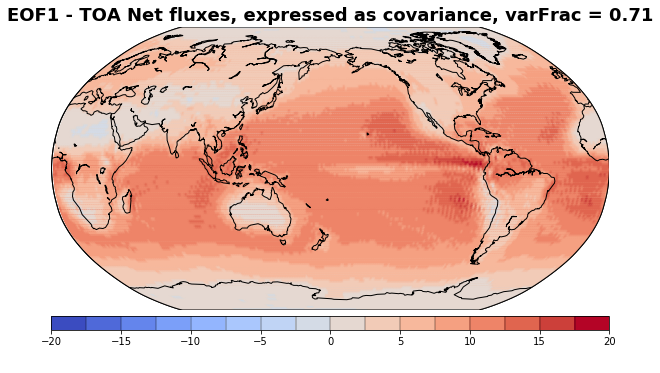

In [16]:
data = eof
eof_nb = 1
title = "EOF1 - TOA Net fluxes, expressed as covariance, varFrac = 0.71"
label_min = -20
label_max = 20
name_figure = "PPE2_EOF1map_N.png"
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [17]:
EOF1_df = eof[0].to_dataframe().drop(labels = 'mode', axis=1)
EOF1_df

eofs
lat        lon                
-88.927735 0.00000    0.008117
           1.40625    0.008117
           2.81250    0.008117
           4.21875    0.008117
           5.62500    0.008117
...                        ...
 88.927735 352.96875  0.219250
           354.37500  0.219250
           355.78125  0.219250
           357.18750  0.219250
           358.59375  0.219250

[32768 rows x 1 columns]

In [18]:
# Save the numpy array in a file  
EOF1_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap1_N.npy')

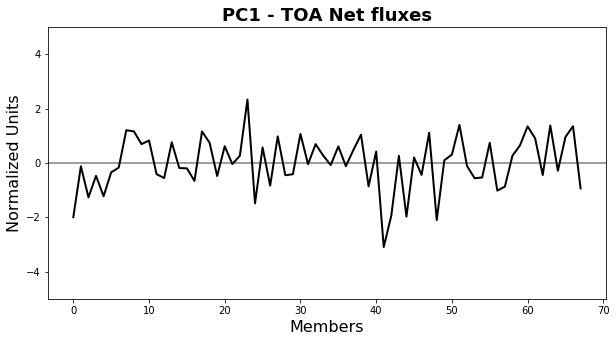

In [19]:
data = pc
pc_nb = 1
ymin = -5
ymax = 5
title = "PC1 - TOA Net fluxes"
name_figure = "PPE2_EOF1pc_N.png"
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [20]:
pc1 = pc[:, 0]

In [21]:
# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF1pc_N.npy', pc1)

### EOF 2 : plotting N

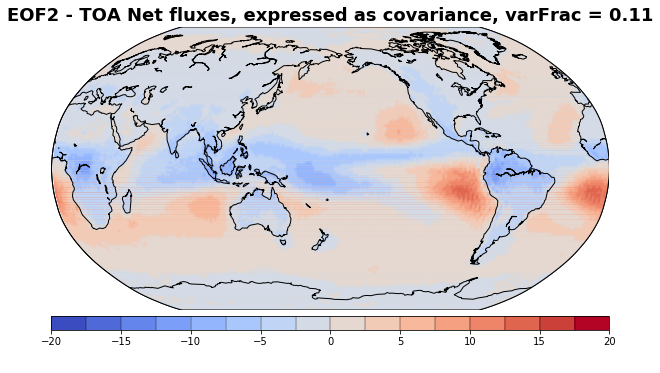

In [22]:
data = eof
eof_nb = 2
title = "EOF2 - TOA Net fluxes, expressed as covariance, varFrac = 0.11"
label_min = -20
label_max = 20
name_figure = "PPE2_EOF2map_N.png"
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [23]:
EOF2_df = eof[1].to_dataframe().drop(labels = 'mode', axis=1)
#EOF1_df
# Save the numpy array in a file  
EOF2_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap2_N.npy')

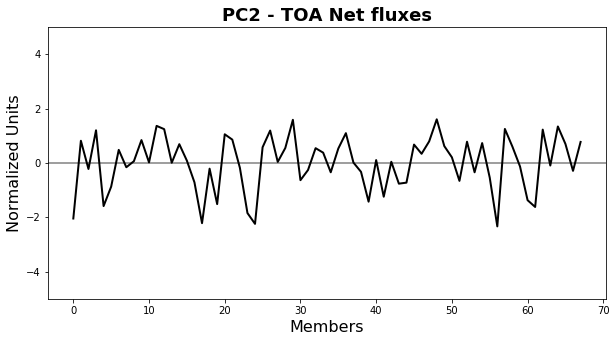

In [24]:
data = pc
pc_nb = 2
ymin = -5
ymax = 5
title = "PC2 - TOA Net fluxes"
name_figure = "PPE2_EOF2pc_N.png"
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [25]:
pc2 = pc[:, 1]

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF2pc_N.npy', pc2)

### EOF 3 : plotting N

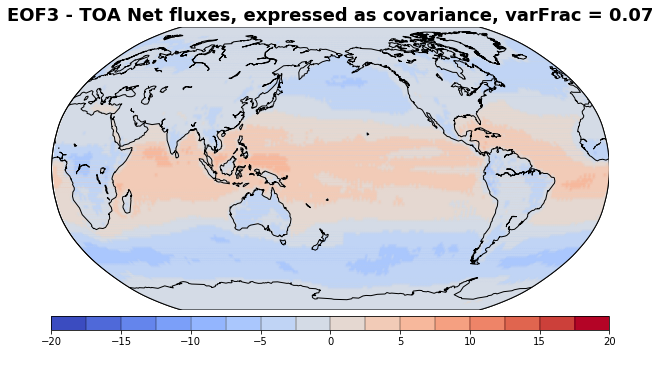

In [26]:
data = eof
eof_nb = 3
title = "EOF3 - TOA Net fluxes, expressed as covariance, varFrac = 0.07"
label_min = -20
label_max = 20
name_figure = "PPE2_EOF3map_N.png"
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [27]:
EOF3_df = eof[2].to_dataframe().drop(labels = 'mode', axis=1)
#EOF1_df
# Save the numpy array in a file  
EOF3_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap3_N.npy')

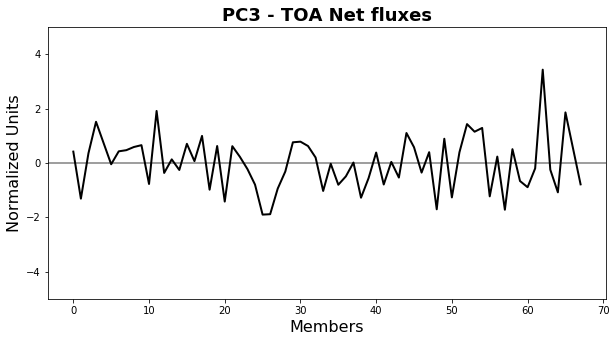

In [28]:
data = pc
pc_nb = 3
ymin = -5
ymax = 5
title = "PC3 - TOA Net fluxes"
name_figure = "PPE2_EOF3pc_N.png"
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [30]:
pc3 = pc[:, 2]


# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy', pc3)

### EOF 4 : plotting N

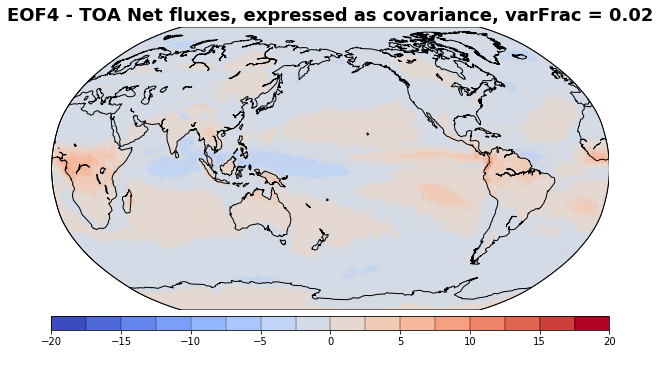

In [31]:
data = eof
eof_nb = 4
title = "EOF4 - TOA Net fluxes, expressed as covariance, varFrac = 0.02"
label_min = -20
label_max = 20
name_figure = "PPE2_EOF4map_N.png"
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [32]:
EOF4_df = eof[3].to_dataframe().drop(labels = 'mode', axis=1)
#EOF1_df
# Save the numpy array in a file  
EOF4_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap4_N.npy')

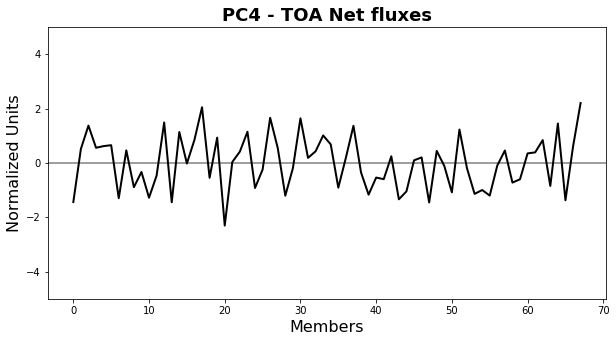

In [33]:
data = pc
pc_nb = 4
ymin = -5
ymax = 5
title = "PC4 - TOA Net fluxes"
name_figure = "PPE2_EOF4pc_N.png"
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [34]:
pc4 = pc[:, 3]


# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF4pc_N.npy', pc4)

### EOF 5 : plotting N

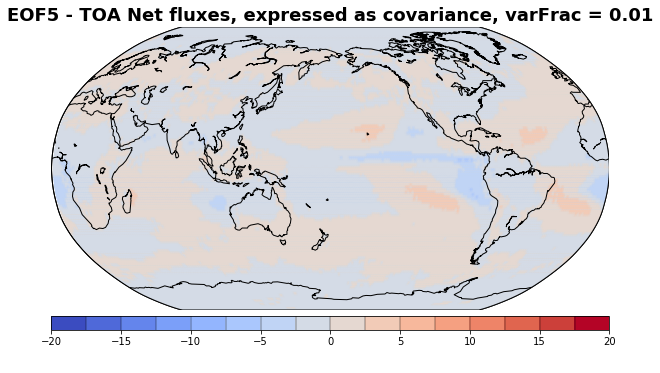

In [35]:
data = eof
eof_nb = 5
title = "EOF5 - TOA Net fluxes, expressed as covariance, varFrac = 0.01"
label_min = -20
label_max = 20
name_figure = "PPE2_EOF5map_N.png"
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [36]:
EOF5_df = eof[4].to_dataframe().drop(labels = 'mode', axis=1)
#EOF1_df
# Save the numpy array in a file  
EOF5_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOFmap5_N.npy')

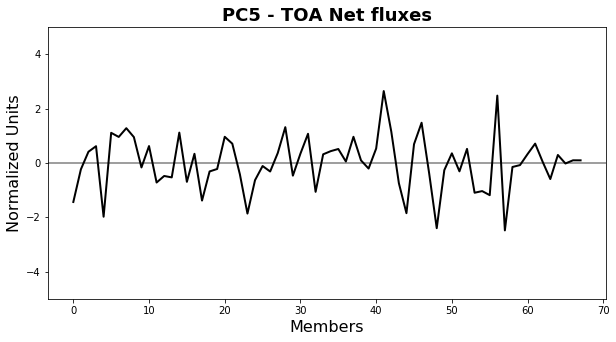

In [37]:
data = pc
pc_nb = 5
ymin = -5
ymax = 5
title = "PC5 - TOA Net fluxes"
name_figure = "PPE2_EOF5pc_N.png"
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [38]:
pc5 = pc[:, 4]


# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF5pc_N.npy', pc5)

## Test de reconstruction des données d'origine :

In [57]:
pc_test1 = pc[:, 0]
pc_test1

<xarray.DataArray 'pcs' (time: 68)>
array([-1.9981673 , -0.12404917, -1.2654476 , -0.47651443, -1.2252793 ,
       -0.34817767, -0.17232661,  1.2024269 ,  1.1602192 ,  0.69073117,
        0.8226753 , -0.41587165, -0.55616874,  0.75792533, -0.18900749,
       -0.2004025 , -0.6622026 ,  1.1575279 ,  0.74024326, -0.48272434,
        0.6142323 , -0.04473285,  0.26320118,  2.3303926 , -1.4901825 ,
        0.5689293 , -0.8372082 ,  0.97621053, -0.4531937 , -0.41720882,
        1.0636804 , -0.04742328,  0.689734  ,  0.27175698, -0.08069342,
        0.6069306 , -0.11961956,  0.48030323,  1.0350854 , -0.86184704,
        0.41838124, -3.0958085 , -1.937713  ,  0.26267827, -1.9767004 ,
        0.201469  , -0.44068956,  1.1101531 , -2.1017458 ,  0.09595218,
        0.30269665,  1.3991855 , -0.11321328, -0.56313586, -0.5359953 ,
        0.7423521 , -1.020378  , -0.8720171 ,  0.26228285,  0.646255  ,
        1.3450803 ,  0.9012871 , -0.44576076,  1.377269  , -0.28982794,
        0.9530555 ,  1.3491604 , -0.93802905], dtype=float32)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 58 59 60 61 62 63 64 65 66 67
    mode     int64 0

In [84]:
Recon_data = eof[0]*pc[:, 0]+eof[1]*pc[:, 1]+eof[2]*pc[:, 2]+eof[3]*pc[:, 3]+eof[4]*pc[:, 4]
Recon_data = Recon_data + N_mean
Recon_data

<xarray.DataArray (lat: 128, lon: 256, time: 68)>
dask.array<add, shape=(128, 256, 68), dtype=float32, chunksize=(128, 256, 68), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 58 59 60 61 62 63 64 65 66 67
    mode     int64 4
    height   float64 2.0

In [78]:
def data_map_plot(data, title, label_min, label_max, name_figure):
    # Plot the EOF map 

    lat = data['lat'][:]
    lon = data['lon'][:]

    fig = plt.figure(figsize=(10, 10))
    ax=plt.gca()

    #eof = eof_nb-1
    #data = data[eof]
    ax.set_title(title, fontsize=18, fontweight = 'bold')

    m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
    x, y = m(*np.meshgrid(lon,lat))


    cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

    m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
    cbar.set_label(' ', size = 16, style = 'italic')

    m.drawcoastlines()
    m.drawmapboundary()
    plt.clim(label_min, label_max)

    # Enregistrer la figure .....................

    plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

    # Show la figure .................
    plt.show()

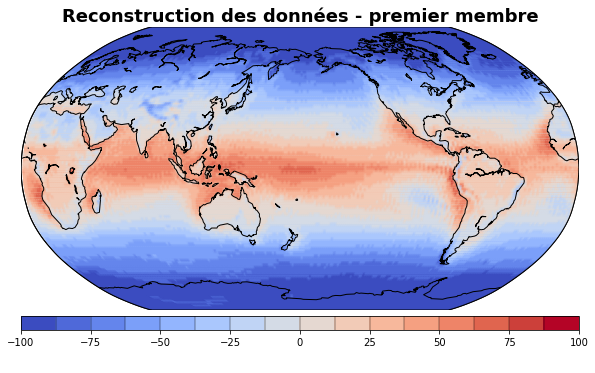

In [61]:
data = Recon_data[:,:,0]
title = "Reconstruction des données - premier membre"
label_min = -100
label_max = 100
name_figure = "Recon_data_PPE.png"
data_map_plot(data, title, label_min, label_max, name_figure)

In [64]:
N_matrix =N_matrix.rename({'time':'mode'})
N_matrix

<xarray.DataArray (mode: 68, lat: 128, lon: 256)>
dask.array<concatenate, shape=(68, 128, 256), dtype=float32, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: mode

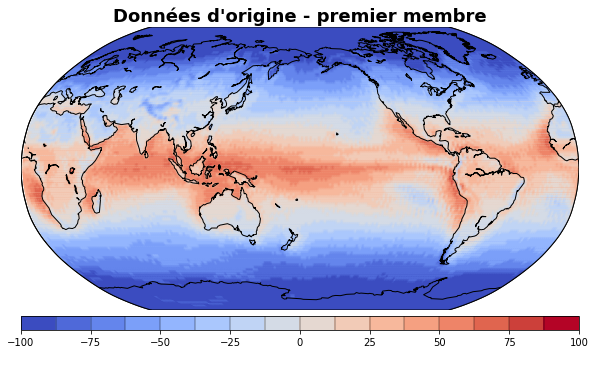

In [65]:
data = N_matrix[0,:,:]
title = "Données d'origine - premier membre"
label_min = -100
label_max = 100
name_figure = "Recon_data_PPE.png"
data_map_plot(data, title, label_min, label_max, name_figure)

In [107]:
Recon_data = Recon_data[:,:,:].drop('mode').rename({'time':'mode'})
Recon_data

<xarray.DataArray (lat: 128, lon: 256, mode: 68)>
dask.array<add, shape=(128, 256, 68), dtype=float32, chunksize=(128, 256, 68), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 ... 58 59 60 61 62 63 64 65 66 67
    height   float64 2.0

In [108]:
diff = Recon_data[:,:,:] - N_matrix[:,:,:]
#diff = diff.drop('time')
diff

<xarray.DataArray (lat: 128, lon: 256, mode: 68)>
dask.array<sub, shape=(128, 256, 68), dtype=float32, chunksize=(128, 256, 1), chunktype=numpy.ndarray>
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 ... 58 59 60 61 62 63 64 65 66 67
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height   float64 2.0

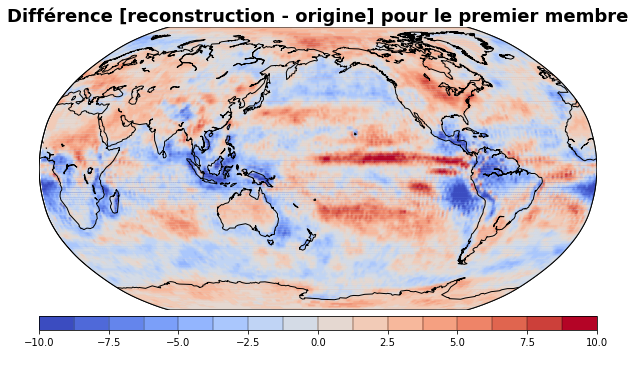

In [112]:
data = diff[:,:,0]
title = "Différence [reconstruction - origine] pour le premier membre"
label_min = -10
label_max = 10
name_figure = "Recon_data_PPE.png"
data_map_plot(data, title, label_min, label_max, name_figure)

In [113]:
def global_diff_plot(data, ymin, ymax, title, y_label, name_figure):
    #pc = solver.pcs(pcscaling=1)
    #pc = pc*-1

    # Plot the leading PC time series.
    plt.figure(figsize=(10, 5))
    
    #pc = pc_nb - 1
    data.plot(color='black', linewidth=2)
    ax = plt.gca()
    ax.axhline(0, color='k', alpha=0.5)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('Members', size = 16)
    ax.set_ylabel(y_label, size = 16)
    ax.set_title(title, fontsize=18, 
             fontweight = 'bold')

    # Enregistrer la figure .....................

    #plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
    #    orientation='portrait', bbox_inches='tight', pad_inches=0.1)

    # Show la figure .................
    plt.show()

In [114]:
diff_global = diff.mean(dim=['lat','lon'])#.drop(dim='time')
diff_global

<xarray.DataArray (mode: 68)>
dask.array<mean_agg-aggregate, shape=(68,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 ... 58 59 60 61 62 63 64 65 66 67
    height   float64 2.0

In [115]:
Recon_data_global = Recon_data.mean(dim=['lat','lon'])#.drop(dim='time')
Recon_data_global

<xarray.DataArray (mode: 68)>
dask.array<mean_agg-aggregate, shape=(68,), dtype=float32, chunksize=(68,), chunktype=numpy.ndarray>
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9 ... 58 59 60 61 62 63 64 65 66 67
    height   float64 2.0

In [116]:
N_matrix_global = N_matrix.mean(dim=['lat','lon'])#.drop(dim='time')
N_matrix_global

<xarray.DataArray (mode: 68)>
dask.array<mean_agg-aggregate, shape=(68,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
Dimensions without coordinates: mode

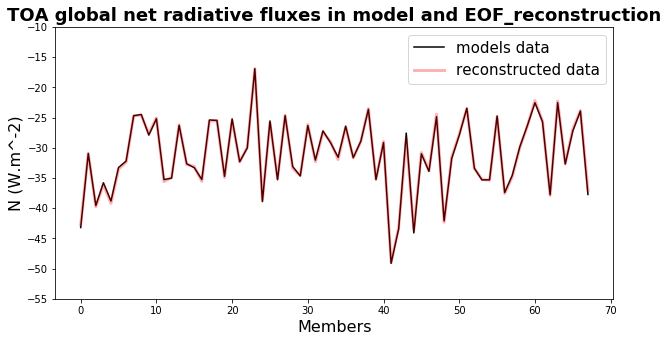

In [117]:
# SETTINGS
ymin = -55
ymax = -10
y_label = 'N (W.m^-2)'
title = 'TOA global net radiative fluxes in model and EOF_reconstruction'
legend = ['models data','reconstructed data']


# PLOT  
plt.figure(figsize=(10, 5))
    
ax = plt.gca()
N_matrix_global.plot(color='black', linewidth=1.5, ax=ax)
Recon_data_global.plot(color='red', alpha=0.3, linewidth=3, ax=ax)

ax.axhline(0, color='k', alpha=0.5)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel(y_label, size = 16)
ax.set_title(title, fontsize=18, 
             fontweight = 'bold')
plt.legend(legend, fontsize=15)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
#    orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

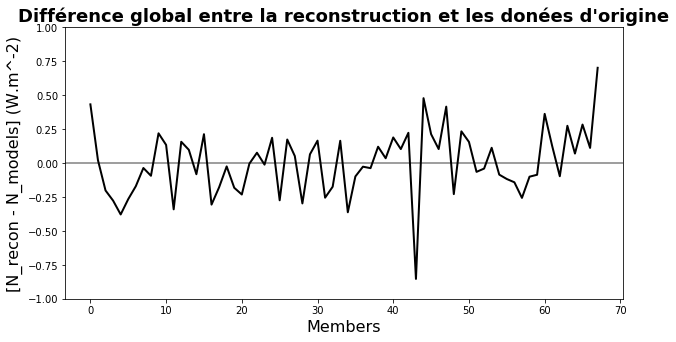

In [120]:
data = diff_global
ymin = -1
ymax = 1
title = "Différence global entre la reconstruction et les donées d'origine"
y_label = "[N_recon - N_models] (W.m^-2)"
name_figure = "PPE2_EOF3pc_N.png"
global_diff_plot(data, ymin, ymax, title, y_label, name_figure)